In [31]:
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# 27/03/2024
# CSC354 – Assignmen2 – ML – Decision Trees
# MUHAMMAD MIKAAL AMJAD
# FA21-BSE-143
# We were provided with a dataset, the dataset was about car prices and we have to find the best model using the decision trees and random forest, by variation of parameters and dropping of data
#Link https://colab.research.google.com/drive/1E6__48ALJPc_vSN42CWVGAPvXAqpoEKz?usp=sharing
#drive.mount("/content/drive")

In [6]:
import pandas as pd
path="/content/drive/MyDrive/Dataset/datasaurus.csv"
data=pd.read_csv(path)
data

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


In [10]:
X = data.drop('dataset', axis=1)  # Coordinates
y = data['dataset']  # Target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = DecisionTreeClassifier()
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.41621621621621624


It can be seen that the accuracy of the Decision Tree classifier is so less. To cope that we must try some variations

In [12]:
regressor = DecisionTreeClassifier(criterion='entropy')
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.40540540540540543


It can be seen that the Accuracy is reduced

In [13]:
regressor = DecisionTreeClassifier(criterion='gini')
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4081081081081081


Using Gini The accuracy is somehow better but still not upto the mark

In [14]:
regressor = DecisionTreeClassifier(criterion='gini',max_depth=2)
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.10540540540540541


It can be seen taking the depth of the decision tree classifier to 2, the accuracy has falled alot

In [17]:
regressor = DecisionTreeClassifier(criterion='gini', max_depth=100)
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.41621621621621624


So increasing the maximum depth makes the accuracy more

In [29]:
param_grid = {
    'max_depth': [100, 150,200],  # Varying maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Varying minimum number of samples required to split a node
}
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'max_depth': 150, 'min_samples_split': 2}
Best Accuracy: 0.4302244617498855


In [28]:
param_grid = {
    'max_depth': list(range(100, 301, 20)),  # Varying maximum depth of the tree from 100 to 300 in steps of 20
    'min_samples_split': [2, 5, 10],  # Varying minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4,8,34],  # Varying minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'criterion': ['gini', 'entropy']  # Splitting criterion
}
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters: {'criterion': 'entropy', 'max_depth': 140, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.4024347228584517


In [25]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 140, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.40650251946862115


  Feature  Importance
0       x    0.513634
1       y    0.486366


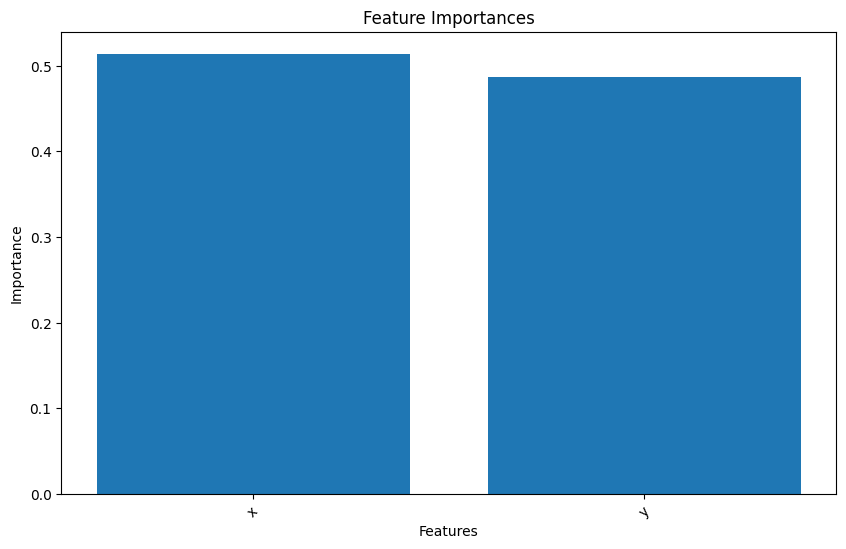

Feature with the least contribution: y


In [26]:
#Feature Contribution
importances = regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(importance_df)

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()
least_contributing_feature = importance_df.iloc[-1]['Feature']
print("Feature with the least contribution:", least_contributing_feature)

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with default hyperparameters
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.44324324324324327


So using the random random forest by python, it can be found that the accuracy of random forest is greater than that of Decision Tree

In [35]:
# Create a Random Forest classifier with specified hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=14)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.45135135135135135


In [36]:
# Create a Random Forest classifier with specified hyperparameters
rf_classifier2 = RandomForestClassifier(n_estimators=120, max_depth=14)

# Train the classifier on the training data
rf_classifier2.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier2.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.4864864864864865


Due to changing of parameters it can be seen that, the accuracy using the random forest is improved

In [37]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy (Best Model):", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

KeyboardInterrupt: 

AttributeError: 'list' object has no attribute 'reshape'